<a href="https://colab.research.google.com/github/everythingdatabab/DACON/blob/main/JY_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
%ls

drive/  sample_data/


In [3]:
cd '/content/drive/MyDrive/dacon'

/content/drive/MyDrive/dacon


In [4]:
%ls

'따릉이 대여량 예측'   logs.log   submission.csv   test.csv   train.csv


In [5]:
tr = pd.read_csv('train.csv')
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [6]:
tr.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [7]:
tr.columns = ['id', 'hour', 'temp','precipitation','windspeed','humidity','visibility','ozone','pm10','pm2.5','count']
tr.head()

,id,hour,temp,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


. train.csv / test.csv

-id 고유 id

-hour 시간

-temperature 기온

-precipitation 비가 오지 않았으면 0, 비가 오면 1

-windspeed 풍속(평균)

-humidity 습도

-visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)

-ozone 오존

-pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)

-pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

-count 시간에 따른 따릉이 대여 수

#EDA

In [8]:
tr.isnull().sum()

id                 0
hour               0
temp               2
precipitation      2
windspeed          9
humidity           2
visibility         2
ozone             76
pm10              90
pm2.5            117
count              0
dtype: int64

In [9]:
tr = tr.fillna(tr.median())

tr.isnull().sum()

id               0
hour             0
temp             0
precipitation    0
windspeed        0
humidity         0
visibility       0
ozone            0
pm10             0
pm2.5            0
count            0
dtype: int64

In [10]:
tr.head()

,id,hour,temp,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [11]:
tr.groupby(['hour'], as_index = False).mean()

,hour,id,temp,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,0,1200.016667,14.818333,0.016667,1.976667,58.050000,1436.600000,0.033850,55.800000,30.816667,71.766667
1,1,1074.918033,14.155738,0.049180,1.844262,60.459016,1400.852459,0.039000,51.000000,26.000000,47.606557
2,2,1077.885246,13.747541,0.049180,1.644262,61.721311,1374.278689,0.030492,58.475410,31.278689,31.409836
3,3,1146.704918,13.357377,0.032787,1.631148,63.131148,1326.311475,0.031213,59.180328,31.377049,21.377049
4,4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.016393,13.524590
5,5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.344262,13.114754
6,6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029475,56.065574,31.327869,24.557377
7,7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025525,56.442623,31.590164,62.360656
8,8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.606557,136.688525
9,9,1076.524590,14.318033,0.016393,1.829508,57.803279,1189.098361,0.021492,59.147541,31.524590,93.540984


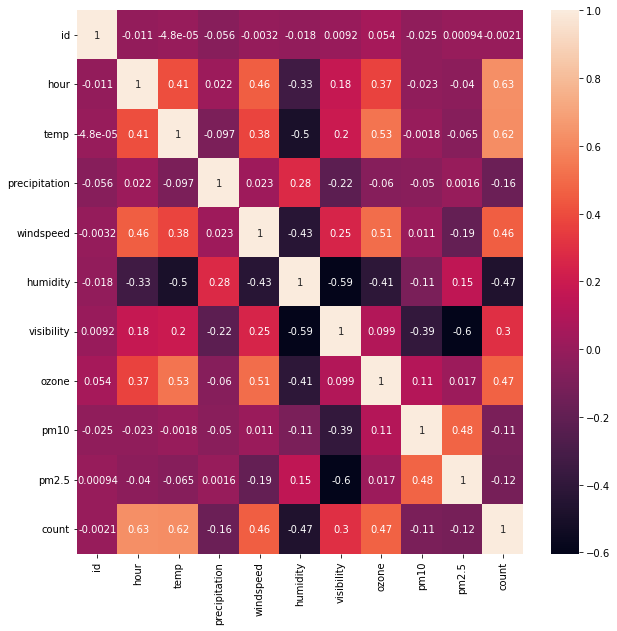

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(tr.corr(), annot = True)

count랑 hour, temp, windspeed, ozone이랑 연관성이 높음 

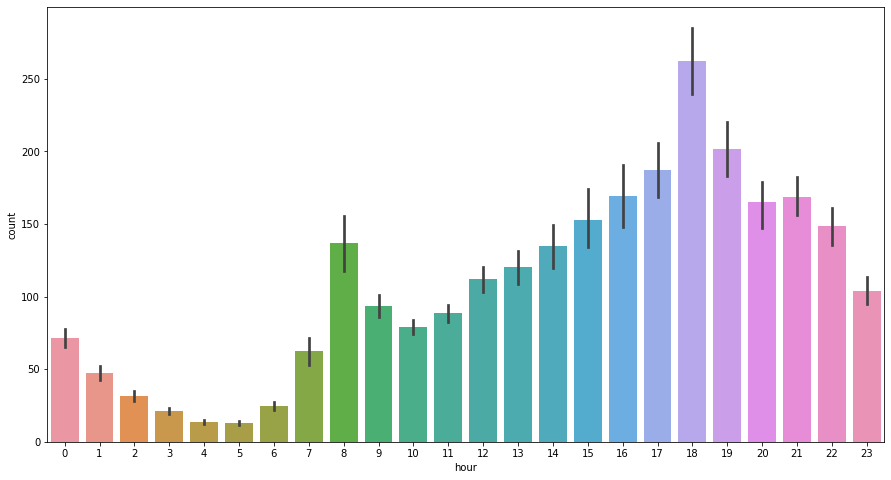

In [13]:
sns.barplot(data=tr, x="hour", y="count")
plt.gcf().set_size_inches(15, 8)

#test파일 전처리


In [14]:
te = pd.read_csv('test.csv')
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [15]:
te.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [16]:
te.columns = ['id', 'hour', 'temp','precipitation','windspeed','humidity','visibility','ozone','pm10','pm2.5']
te.head()

,id,hour,temp,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [17]:
te.isnull().sum()

id                0
hour              0
temp              1
precipitation     1
windspeed         1
humidity          1
visibility        1
ozone            35
pm10             37
pm2.5            36
dtype: int64

In [18]:
te = te.fillna(te.median())

te.isnull().sum()

id               0
hour             0
temp             0
precipitation    0
windspeed        0
humidity         0
visibility       0
ozone            0
pm10             0
pm2.5            0
dtype: int64

#스케일링

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [22]:
# 훈련데이터의 모수 분포 저장
scaler.fit(tr)

# 훈련 데이터 스케일링
X_train_scaled = scaler.transform(tr)

In [23]:
# 훈련데이터의 모수 분포 저장
scaler.fit(te)

# 테스트 데이터의 스케일링
X_test_scaled = scaler.transform(te)

In [24]:
X_test_scaled

array([[-1.69059709, -0.6460136 , -0.63529697, ..., -0.00437603,
         0.5824655 ,  0.21476731],
       [-1.68899744,  0.79832575,  1.67009879, ...,  0.98891337,
         0.98869144,  1.13183942],
       [-1.68739779,  0.22059001, -1.0567134 , ..., -1.0473299 ,
        -0.067496  ,  0.31666421],
       ...,
       [ 1.77264458, -0.35714573,  0.00922228, ..., -1.0473299 ,
        -1.61115457, -1.00799549],
       [ 1.77424423,  0.65389181,  0.92642274, ..., -0.45135626,
         0.25748475,  0.11287041],
       [ 1.79184038, -0.50157966, -0.23866974, ..., -1.69296801,
        -0.55496713, -0.09092339]])

# 다시 전처리

In [25]:
target = tr['count']

In [26]:
from scipy import stats
from scipy.stats import norm

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([  1.,   1.,   1., ..., 402., 425., 431.])),
 (79.68008670144783, 108.56339958875944, 0.9626869341365097))

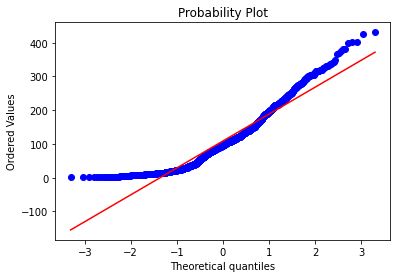

In [27]:
stats.probplot(tr['count'], plot = plt)

In [28]:
tr["log_count"] = np.log(target+1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


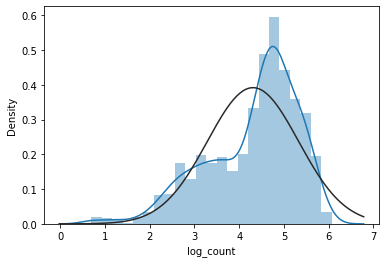

In [29]:
sns.distplot(tr["log_count"], fit=norm)

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 5.99893656, 6.05443935,
         6.06842559])),
 (0.9880540764406922, 4.30785524967184, 0.9680380858045442))

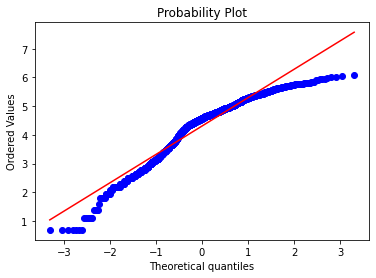

In [30]:
stats.probplot(tr["log_count"], plot = plt)

In [31]:
feature_names=list(te)
df_train=tr[feature_names]
df=pd.concat((df_train, te))

In [32]:
df.head()

,id,hour,temp,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0


In [33]:
from scipy.stats import skew
skew = df.apply(lambda x: skew(x))
skew.sort_values(ascending = False)

precipitation    4.820007
pm10             2.747516
pm2.5            1.494526
ozone            0.586712
windspeed        0.521470
humidity         0.121464
hour             0.004794
id               0.000506
temp            -0.036421
visibility      -0.456122
dtype: float64

In [34]:
skew = skew[abs(skew) > 0.5]
skew

precipitation    4.820007
windspeed        0.521470
ozone            0.586712
pm10             2.747516
pm2.5            1.494526
dtype: float64

In [35]:
cor = tr.iloc[:,1:-1].corr()
cor.head()

,hour,temp,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
hour,1.000000,0.406808,0.021708,0.461044,-0.329170,0.176115,0.369427,-0.022758,-0.039734,0.626047
temp,0.406808,1.000000,-0.097048,0.375209,-0.496085,0.197396,0.530370,-0.001767,-0.065099,0.618925
precipitation,0.021708,-0.097048,1.000000,0.022888,0.276489,-0.217210,-0.060422,-0.050081,0.001639,-0.163580
windspeed,0.461044,0.375209,0.022888,1.000000,-0.432547,0.251131,0.510958,0.010713,-0.187024,0.458924
humidity,-0.329170,-0.496085,0.276489,-0.432547,1.000000,-0.592232,-0.411524,-0.105991,0.150322,-0.470663


In [36]:
vif_data = df.iloc[:,:6]
vif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 714
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2174 non-null   int64  
 1   hour           2174 non-null   int64  
 2   temp           2174 non-null   float64
 3   precipitation  2174 non-null   float64
 4   windspeed      2174 non-null   float64
 5   humidity       2174 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 118.9 KB


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = pd.DataFrame()
vif['Features'] = vif_data.columns
vif['vif'] = [variance_inflation_factor(
             vif_data.values, i) for i in range(vif_data.shape[1])]
vif.sort_values(by='vif',ascending=False)

,Features,vif
2,temp,9.279091
4,windspeed,5.726740
1,hour,5.196574
5,humidity,4.815502
0,id,3.702088
3,precipitation,1.157648


In [41]:
vif

,Features,vif
0,id,3.702088
1,hour,5.196574
2,temp,9.279091
3,precipitation,1.157648
4,windspeed,5.726740
5,humidity,4.815502


In [42]:
vif = vif.drop([0], axis=0)
vif.head()

,Features,vif
1,hour,5.196574
2,temp,9.279091
3,precipitation,1.157648
4,windspeed,5.726740
5,humidity,4.815502


vif가 10 이상인 데이터는 없어서 그냥 쓰는것으로 함 

# 모델링

In [55]:
df = df.drop(['id'], axis=1)
df.head()

,hour,temp,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0


In [43]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [56]:
new_train = df[:tr.shape[0]]
new_test = df[tr.shape[0]:]

In [57]:
target = tr['log_count']

In [58]:
X_train, X_val, y_train, y_val = train_test_split(new_train, target, test_size=0.2, shuffle=True)

In [59]:
def rmsle_score(preds, true):
    rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

In [60]:
from sklearn.metrics import make_scorer

RMSLE = make_scorer(rmsle_score)

In [61]:
import statsmodels.api as sm
model = sm.OLS(target.values, new_train.astype(float))
re = model.fit()
print('----------------')
re.summary()

----------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              6276.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                        0.00
Time:                        06:23:45   Log-Likelihood:                         -1550.5
No. Observations:                1459   AIC:                                      3119.
Df Residuals:                    1450   BIC:                                      3167.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
hour              0.0627      0.003     19.829      0.000       0.056       0.069
temp              0.0897      0.004     21.690      0.000       0.082       0.098
precipitation    -1.3230      0.112    -11.794      0.000      -1.543      -1.103
windspeed         0.1026      0.017      5.962      0.000       0.069       0.136
humidity          0.0119      0.001     15.535      0.000       0.010       0.013
visibility        0.0006   3.13e-05     19.084      0.000       0.001       0.001
ozone            -0.6143      1.269     -0.484      0.628      -3.103       1.875
pm10              0.0018      0.001      2.704      0.007       0.001       0.003
pm2.5             0.0106      0.002      6.664      0.000       0.007       0.014
==============================================================================
Omnibus:                      168.971   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.021
Skew:                          -0.544   Prob(JB):                    2.06e-128
Kurtosis:                       5.914   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#LASSO 

In [62]:
param = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}

In [63]:
lasso = make_pipeline(GridSearchCV(Lasso(random_state=1),param,
                                  cv=10, scoring = RMSLE))

In [ ]:
lasso.fit(X_train,y_train)

In [65]:
la_yhat = lasso.predict(X_val)

In [66]:
s_lasso = rmsle_score(la_yhat,y_val)
s_lasso

0.24577877526598624

In [ ]:
pred_la = lasso.predict(new_test)
pred_la

#ElasticNet

In [68]:
param_e = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
           'normalize':[True,False]}

In [69]:
Enet = make_pipeline(GridSearchCV(ElasticNet(random_state=1),param_e,
                     cv=10, scoring = RMSLE))

In [ ]:
Enet.fit(X_train,y_train)

In [71]:
Enet_yhat = Enet.predict(X_val)

In [72]:
s_Enet = rmsle_score(Enet_yhat,y_val)
s_Enet

0.24577877526598624

In [73]:
pred_Enet = Enet.predict(new_test)

#RandomForest Regressor

In [74]:
param_Rf =  {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }

In [75]:
RF = make_pipeline(GridSearchCV(RandomForestRegressor(random_state=1),param_Rf,
                   cv=10, scoring = RMSLE))

In [76]:
RF.fit(X_train,y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=RandomForestRegressor(random_state=1),
                              param_grid={'min_samples_split': [3, 4, 6, 10],
                                          'n_estimators': [70, 100],
                                          'random_state': [5]},
                              scoring=make_scorer(rmsle_score)))])

In [77]:
RF_yhat = RF.predict(X_val)
s_RF = rmsle_score(RF_yhat,y_val)
s_RF

0.15109824091788035

In [78]:
pred_RF = RF.predict(new_test)

# GradientBoostingRegressor

In [79]:
param_GB = [{'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000]}]

In [80]:
GB = make_pipeline(GridSearchCV(GradientBoostingRegressor(random_state=1),param_GB,
                   cv=10, scoring = RMSLE))

In [81]:
GB.fit(X_train,y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=GradientBoostingRegressor(random_state=1),
                              param_grid=[{'learning_rate': [1, 0.1, 0.01,
                                                             0.001],
                                           'n_estimators': [50, 100, 200, 500,
                                                            1000]}],
                              scoring=make_scorer(rmsle_score)))])

In [82]:
GB_yhat = GB.predict(X_val)
s_GB = rmsle_score(GB_yhat,y_val)
s_GB

0.24052077414744272

In [83]:
pred_GB = GB.predict(new_test)

#LGBMregressor

In [84]:
param_lgb = param_grid = [{
    'n_estimators': [400, 700, 1000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}]

In [85]:
lgb = make_pipeline(GridSearchCV(LGBMRegressor(verbose_eval=False,random_state=1),param_lgb,
                    cv=10, scoring = RMSLE))

In [86]:
lgb.fit(X_train,y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=LGBMRegressor(random_state=1,
                                                      verbose_eval=False),
                              param_grid=[{'max_depth': [15, 20, 25],
                                           'min_split_gain': [0.3, 0.4],
                                           'n_estimators': [400, 700, 1000],
                                           'num_leaves': [50, 100, 200]}],
                              scoring=make_scorer(rmsle_score)))])

In [87]:
lgb_yhat = lgb.predict(X_val)
s_lgb = rmsle_score(lgb_yhat,y_val)
s_lgb

0.1494733461172254

In [105]:
y_val

1202    4.454347
1216    5.497168
1306    4.248495
675     5.659482
263     5.308268
          ...   
26      3.401197
808     5.123964
1047    4.682131
179     2.708050
248     4.454347
Name: log_count, Length: 292, dtype: float64

In [88]:
pred_lgb = lgb.predict(new_test)

In [89]:
list_scores = [s_lasso, s_Enet, s_RF,s_GB,s_lgb]
list_regressors = ['Lasso','Enet','RF','GB','lgb']

Text(0, 0.5, 'RMSE')

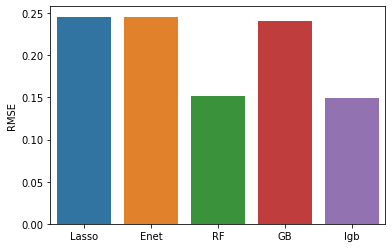

In [90]:
sns.barplot(x=list_regressors, y=list_scores)
plt.ylabel('RMSE')

#앙상블

In [91]:
predictions = {'Lasso': pred_la,
               'ElaNet': pred_Enet, 
               'RF': pred_RF,
               'GB': pred_GB,
               #'XGB' : pred_xgb,
               'lgb' : pred_lgb
              }

In [92]:
df_predictions = pd.DataFrame(data=predictions) 
df_predictions.corr()

,Lasso,ElaNet,RF,GB,lgb
Lasso,NaN,NaN,NaN,NaN,NaN
ElaNet,NaN,NaN,NaN,NaN,NaN
RF,NaN,NaN,1.000000,0.937484,0.984834
GB,NaN,NaN,0.937484,1.000000,0.941436
lgb,NaN,NaN,0.984834,0.941436,1.000000


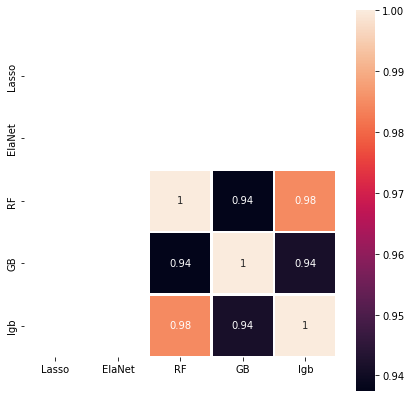

In [93]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_predictions.corr(),linewidths=1.5,
            annot=True, 
            square=True,          
            yticklabels=df_predictions.columns , 
            xticklabels=df_predictions.columns)

# 예측

In [131]:
log_y = np.log(target)

In [139]:
RF.fit(new_train,log_y) #x_train, y_train 

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=RandomForestRegressor(random_state=1),
                              param_grid={'min_samples_split': [3, 4, 6, 10],
                                          'n_estimators': [70, 100],
                                          'random_state': [5]},
                              scoring=make_scorer(rmsle_score)))])

In [140]:
log_pred=RF.predict(new_test) #x_test
predictions=np.exp(log_pred)-1

In [141]:
rf_sco = rmsle_score(log_y,log_pred)
rf_sco

ValueError: ignored

In [ ]:
predictions

In [108]:
sub = pd.DataFrame()
sub['id'] = te['id']
sub['rf_count'] = predictions
sub.head()

,id,rf_count
0,0,80.136637
1,1,212.420537
2,2,30.811668
3,4,29.728946
4,5,26.112473


# lgb모델

In [106]:
lgb.fit(new_train,target)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=LGBMRegressor(random_state=1,
                                                      verbose_eval=False),
                              param_grid=[{'max_depth': [15, 20, 25],
                                           'min_split_gain': [0.3, 0.4],
                                           'n_estimators': [400, 700, 1000],
                                           'num_leaves': [50, 100, 200]}],
                              scoring=make_scorer(rmsle_score)))])

In [107]:
log_pred_lgb=lgb.predict(new_test)
predictions_lgb=np.exp(log_pred_lgb)-1

In [113]:
lgb_sco = rmsle_score(log_pred_lgb,predictions_lgb)
lgb_sco

2.9065184138946036

In [109]:
sub['lgb_count'] = predictions_lgb
sub.head()

,id,rf_count,lgb_count
0,0,80.136637,88.620428
1,1,212.420537,204.755800
2,2,30.811668,14.715494
3,4,29.728946,33.072652
4,5,26.112473,13.248988


In [ ]:
ensemble = (0.6*predictions + 0.4*predictions_lgb) 
ensemble

In [111]:
sub['ensemble_count'] = ensemble
sub.head()

,id,rf_count,lgb_count,ensemble_count
0,0,80.136637,88.620428,83.530154
1,1,212.420537,204.755800,209.354642
2,2,30.811668,14.715494,24.373199
3,4,29.728946,33.072652,31.066428
4,5,26.112473,13.248988,20.967079


In [129]:
sub.to_csv('submission.csv', index=False)

In [ ]:
figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[2])
axes[1].set_title('Predicted Test Data Distribution');